In [1]:
#Importing dependencies
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
#!pip install gensim
#!pip install google.cloud
#import gzip
import gensim
import logging

# Bag of Words

## Sample Data

In [2]:
corpus = ['king is a strong man','queen is a wise woman','boy is a young man',
          'girl is a young woman','prince is a young','prince will be strong',
          'princess is young','man is strong','woman is pretty', 'prince is a boy',
          'prince will be king', 'princess is a girl', 'princess will be queen']
print(corpus)

['king is a strong man', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young', 'prince will be strong', 'princess is young', 'man is strong', 'woman is pretty', 'prince is a boy', 'prince will be king', 'princess is a girl', 'princess will be queen']


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
DTM = cv.fit_transform(corpus)
DTM = pd.DataFrame(DTM.toarray(), columns=cv.get_feature_names_out())
DTM

,be,boy,girl,is,king,man,pretty,prince,princess,queen,strong,will,wise,woman,young
0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


## DTM on Review Data

In [4]:
data = {'review': ['I loved this movie!', 'It was okay.', 'I hated it.', 'It was amazing!', 'I was disappointed.',
                   'It was a great experience.', 'I fell asleep during the movie.', 'It was a total waste of time.',
                   'I highly recommend this movie.', 'I would not recommend this movie.'],
       'sentiment': ['positive', 'neutral', 'negative', 'positive', 'negative',
                      'positive', 'negative', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)
df

,review,sentiment
0,I loved this movie!,positive
1,It was okay.,neutral
2,I hated it.,negative
3,It was amazing!,positive
4,I was disappointed.,negative
5,It was a great experience.,positive
6,I fell asleep during the movie.,negative
7,It was a total waste of time.,negative
8,I highly recommend this movie.,positive
9,I would not recommend this movie.,negative


In [5]:
# Convert the input data into a DTM
cv = CountVectorizer()
dtm = cv.fit_transform(df['review'])
dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm["y_value"]=df["sentiment"]
# Print the DTM
dtm

,amazing,asleep,disappointed,during,experience,fell,great,hated,highly,it,...,okay,recommend,the,this,time,total,was,waste,would,y_value
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,neutral
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,negative
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
5,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
6,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,negative
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,positive
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,negative


# Word Embeddings

[['Trees', 'tall'], ['Trees', 'green'], ['Trees', 'majestic'], ['Trees', 'essential'], ['Trees', 'diverse'], ['Trees', 'oxygen-giving'], ['computers', 'fast'], ['computers', 'smart'], ['computers', 'useful'], ['computers', 'powerful'], ['computers', 'everywhere'], ['computers', 'changing']]


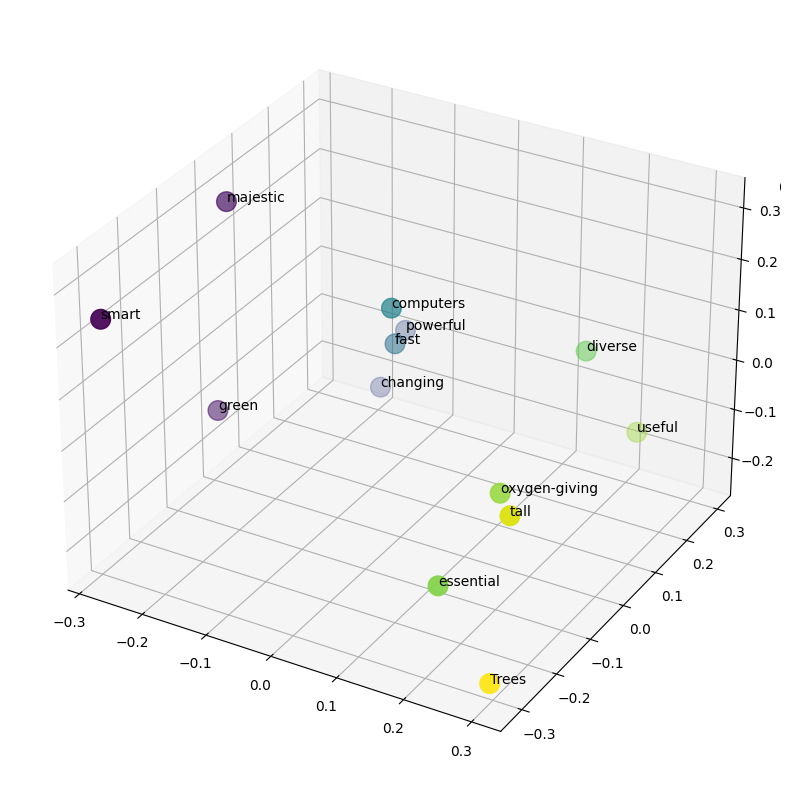

In [62]:
statements = [
"Trees  tall",
"Trees  green",
"Trees  majestic",
"Trees  essential",
"Trees  diverse",
"Trees  oxygen-giving",
"computers  fast",
"computers  smart",
"computers  useful",
"computers  powerful",
"computers  everywhere",
"computers  changing"
]

statements_list = []
for statement in statements:
  statements_list.append(statement.split())
print(statements_list)
from gensim.parsing.preprocessing import STOPWORDS
documents = [[word for word in document if word not in STOPWORDS] for document in statements_list]

from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=3, window = 3)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

import matplotlib.pyplot as plt

vectors = model.wv.vectors


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

xdata = vectors[:, 0]
ydata = vectors[:, 1]
zdata = vectors[:, 2]
names=model.wv.index_to_key

ax.scatter3D(xdata, ydata, zdata, s=200 , c=xdata)
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()


[['Trees', 'are', 'tall'], ['Trees', 'are', 'green'], ['Trees', 'are', 'majestic'], ['Trees', 'are', 'essential'], ['Trees', 'are', 'diverse'], ['Trees', 'are', 'oxygen-giving'], ['computers', 'are', 'fast'], ['computers', 'are', 'smart'], ['computers', 'are', 'useful'], ['computers', 'are', 'powerful'], ['computers', 'are', 'everywhere'], ['computers', 'are', 'changing']]


In [40]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=3, window = 5)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

## Hyperparameters

### size
The hidden nodes size. The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes.

### window
Context window size. The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

## Checking the word2vec output

In [45]:
for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  print(word, vector)

Trees [-0.01787424  0.00788105  0.17011166]
computers [ 0.3004774  -0.31021708 -0.23723198]
powerful, [ 0.21529575  0.2990996  -0.16718094]
useful. [-0.1254112   0.24596383 -0.05111529]
changing [-0.15112837  0.21843019 -0.1620434 ]
everywhere, [-0.06053392  0.09588599  0.03306246]
fast, [-0.27617383 -0.3149606   0.24372554]
smart, [0.16902426 0.22526138 0.02539612]
diverse, [ 0.21169634 -0.1135122  -0.03154671]
oxygen-giving [ 0.19228578 -0.25072125 -0.13120346]
essential. [-0.2503861  -0.03100141  0.31793728]
majestic, [-0.24397223 -0.07779229 -0.06459137]
green, [ 0.2693399  -0.19774684  0.00152672]
tall, [-0.1584578  -0.32011834  0.16690977]


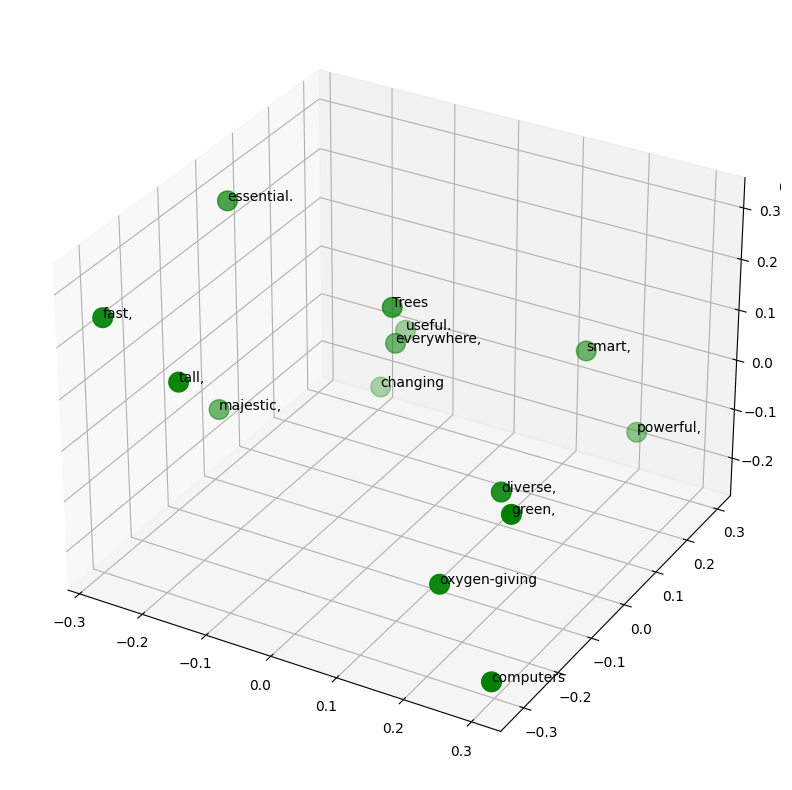

In [46]:
import matplotlib.pyplot as plt

vectors = model.wv.vectors


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

xdata = vectors[:, 0]
ydata = vectors[:, 1]
zdata = vectors[:, 2]
names=model.wv.index_to_key

ax.scatter3D(xdata, ydata, zdata, s=200 , c='green')
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()


# Word2Vec Example-2

In [11]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Amazon_Yelp_Reviews/Review_Data.csv", "Review_Data.csv")
data_file="Review_Data.csv"

In [12]:
def read_input(input_file):
    with open (input_file, 'rb') as f:
        for i, line in enumerate (f):
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)
            # read the tokenized reviews into a list
            # each review item becomes a series of words
            # so this becomes a list of lists
    print("File reading done !!")
documents = list (read_input (data_file))

File reading done !!


In [13]:
print(documents)

[['id', 'review', 'sentiment'], ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'for', 'the', 'jawbone'], ['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems'], ['the', 'mic', 'is', 'great'], ['have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume'], ['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one'], ['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this'], ['needless', 'to', 'say', 'wasted', 'my', 'money'], ['what', 'waste', 'of', 'money', 'and', 'time'], ['and', 'the', 'sound', 'quality', 'is', 'great'], ['he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to',

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=10)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

In [15]:
# Print the vectors for a couple of words

for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  if word in ["good", "bad", "money"]:
    print(word, vector)

good [ 0.5330758  -0.3965808   0.7046104   0.06639984  0.22544377  0.34674227
  1.499191    0.7014877  -1.3145419  -0.82121813]
bad [ 0.28541294 -0.1981527   0.41236624  0.11872167  0.15340407  0.0822339
  0.6901066   0.40308145 -0.64853454 -0.4009509 ]
money [ 0.17129116 -0.1830193   0.4099461  -0.08256408  0.15110199  0.16358116
  0.5296344   0.3755482  -0.4113598  -0.40045947]


# Word Embeddings on TensorFlow - Sentiment Analysis Project

In [16]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import GlobalAveragePooling1D, Dropout, Embedding, Dense

In [17]:
# Load the IMDB dataset
dataset = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = dataset.load_data()

# Create the embedding layer
embedding_layer = tf.keras.layers.Embedding(30000, 32)

# Preprocess the data
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=128)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=128)

# Build the model
model = tf.keras.Sequential([
  embedding_layer,
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 46s 55ms/step - loss: 0.5923 - accuracy: 0.7599 - val_loss: 0.4723 - val_accuracy: 0.8217
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3854 - accuracy: 0.8565 - val_loss: 0.3639 - val_accuracy: 0.8490
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2980 - accuracy: 0.8887 - val_loss: 0.3256 - val_accuracy: 0.8638
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2498 - accuracy: 0.9080 - val_loss: 0.3109 - val_accuracy: 0.8683
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2144 - accuracy: 0.9236 - val_loss: 0.3068 - val_accuracy: 0.8686
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1866 - accuracy: 0.9358 - val_loss: 0.3103 - val_accuracy: 0.8669
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.162

In [18]:
# Train the model
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/10
 86/782 [==>...........................] - ETA: 4s - loss: 0.0819 - accuracy: 0.9793

KeyboardInterrupt: 

In [ ]:
#Load the pre-built model
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Saved_models/sentiment_model_new.h5
model.load_weights("sentiment_model_new.h5")

In [ ]:
#Predictions on new reviews
review= "Great movie, I wateched it multiple times. Great Acting and Direction"
review= "Not a Great movie, I could not watch it. Acting and Direction"

preprocessed_review = tf.keras.preprocessing.text.Tokenizer().texts_to_sequences([review])
preprocessed_review = tf.keras.preprocessing.sequence.pad_sequences(preprocessed_review, maxlen=128)
prediction = model.predict(preprocessed_review)
if prediction > 0.5:
  sentiment="Positive"
else:
  sentiment="Negative"
print(f"Sentiment: {sentiment}")